In [1]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#Reading Data
salary = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA Process:

In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [5]:
salary['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [6]:
salary['Salary'].unique()

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
salary.shape

(30, 2)

In [8]:
salary[salary.duplicated()]

,YearsExperience,Salary


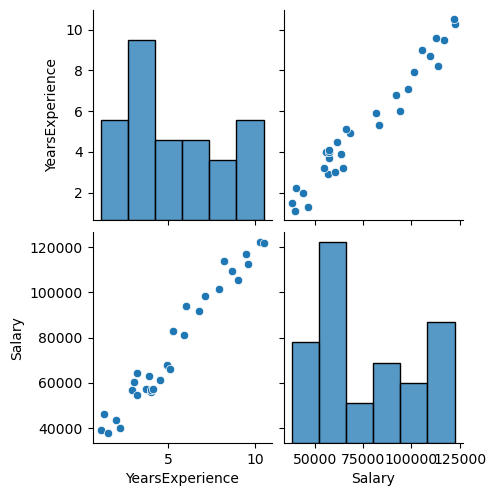

In [9]:
sns.pairplot(data = salary)
plt.show()

C:\Users\Anup0\AppData\Local\Temp\ipykernel_12920\2240156110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

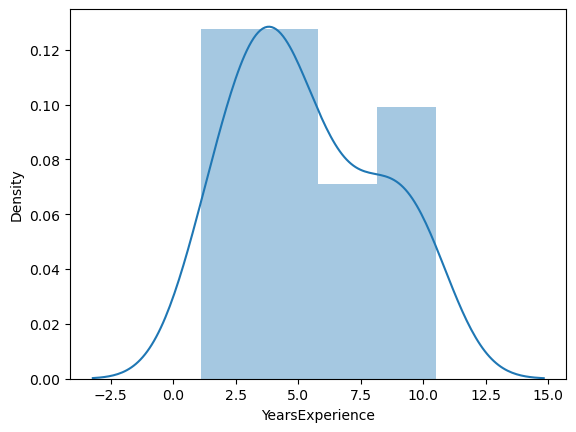

In [10]:
sns.distplot(salary['YearsExperience'])

C:\Users\Anup0\AppData\Local\Temp\ipykernel_12920\708293685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

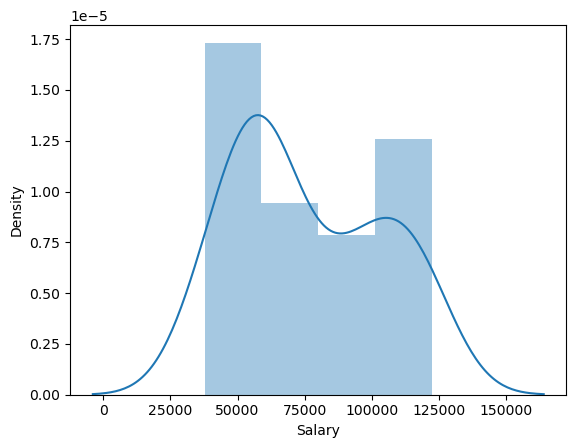

In [11]:
sns.distplot(salary['Salary'])

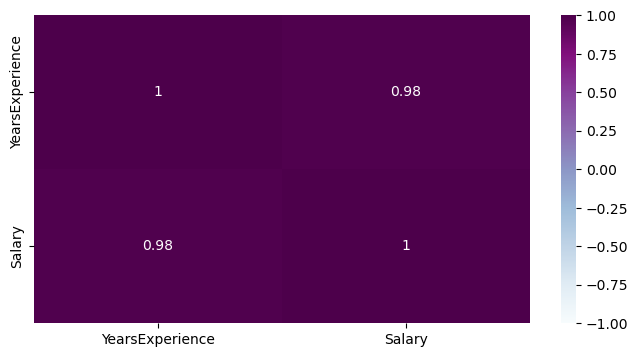

In [12]:
#Checking for correlation between variables:
plt.figure(figsize=(8,4))
sns.heatmap(salary.corr(),vmax = 1,vmin=-1,annot=True,cmap='BuPu')
plt.show()

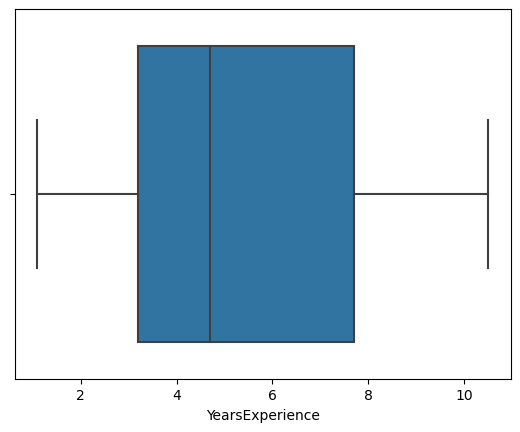

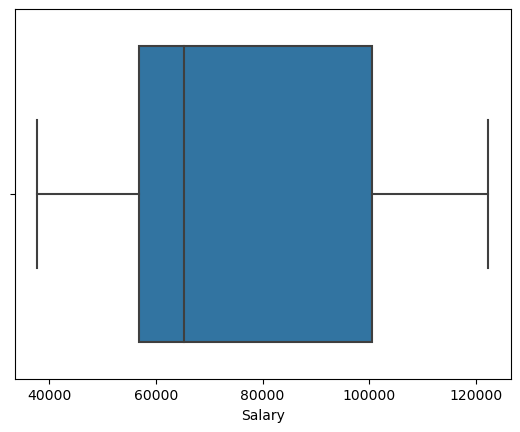

In [13]:
#Checking for outliers
sns.boxplot(x='YearsExperience',data = salary)
plt.show()
sns.boxplot(x='Salary',data = salary)
plt.show()

## Transforming data

In [14]:
salary_trans = np.log(salary)

C:\Users\Anup0\AppData\Local\Temp\ipykernel_12920\3585282125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_trans['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

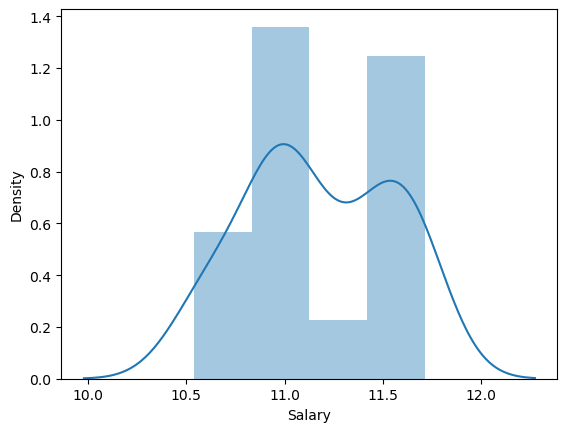

In [16]:
sns.distplot(salary_trans['Salary'])

C:\Users\Anup0\AppData\Local\Temp\ipykernel_12920\932987219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_trans['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

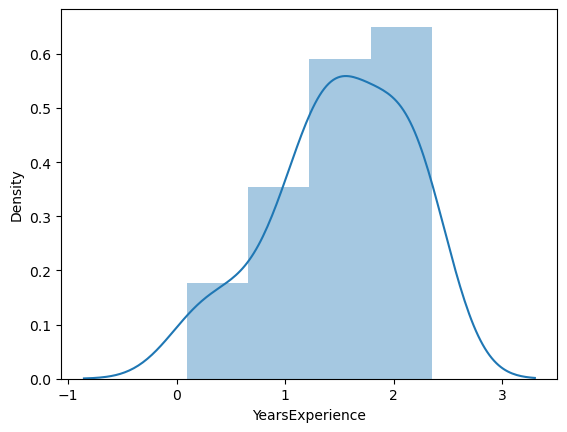

In [17]:
sns.distplot(salary_trans['YearsExperience'])

## Preparing a Model

In [18]:
#Splitting data into Dependent(y:target) and Independent variable(x:feature)
x=salary.iloc[:,:-1].values
y=salary.iloc[:,-1].values

In [19]:
#Further Spliting the data into Train & Test :
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 7)

In [20]:
#Creating model and training with train data set:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
#Now that our model is ready, let's predict y using x from test data set:
y_pred = model.predict(x_test)

In [22]:
#Evaluating the model:
mse = mean_squared_error(y_test,y_pred)
print('mean_squared_error is : ' ,mse)
r2 = r2_score(y_test,y_pred)
print('r2_score is : ' ,r2)


mean_squared_error is :  36064238.49395526
r2_score is :  0.8143022783109006


## Residual Plot for Homoscedasticity

In [23]:
def get_standardized_values(x):
    return (x-x.mean())/x.std()

C:\Users\Anup0\AppData\Local\Temp\ipykernel_12920\2689105358.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(get_standardized_values(y_pred),get_standardized_values(y_test-y_pred),cmap='PuBu')


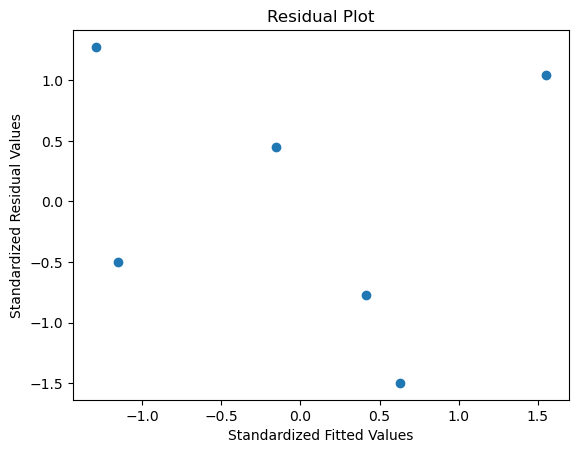

In [24]:
plt.scatter(get_standardized_values(y_pred),get_standardized_values(y_test-y_pred),cmap='PuBu')
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [25]:
#No pattern Observed. Hence model is correct.


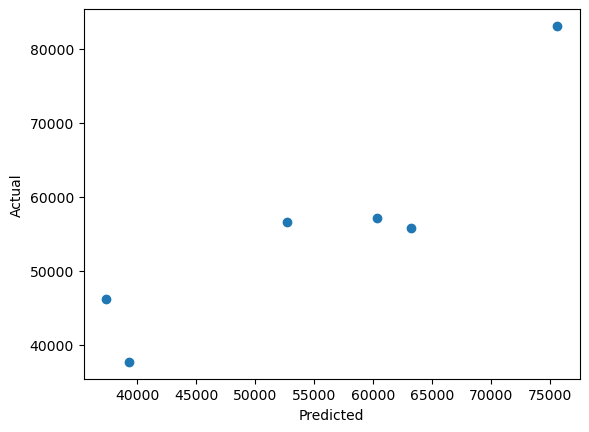

In [26]:
plt.scatter(y=y_test,x=y_pred)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()